<a href="https://colab.research.google.com/github/gabrielasenareis/Portfolio/blob/main/An%C3%A1lise_de_vendas_ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RESUMO**

# Entendendo o dataset e questões relacionadas

O conjunto de dados explora informações de algumas lojas de ecommerce. Ele fornece, a respeito de cada produto, informações sobre o seu preço, categoria, avaliação (de 1 a 5), quantidade de avaliações e o valor das vendas num período de 12 meses, separando as vendas de cada mês.
Separei algumas questões para serem respondidas nessa análise descritiva, que considerei interessantes:
*   Quais são as categorias de produtos com melhor desempenho em termos de vendas?
*   Existe uma diferença siginificativa das vendas em cada categoria?
*   E em cada categoria, existe uma diferença siginificativa das vendas em cada mês?
*   Existe uma diferença siginificativa das vendas totais em cada mês do ano?
*   Quais são os 10 produtos mais vendidos e o que eles tem em comum?
*  Existe uma relação entre o preço do produto nas avaliações dos clientes?
*   Cada categoria tem uma média de avaliação significativamente diferentes?
*   Existe uma relação entre as vendas e a avaliação dos produtos? Avaliações mais altas se correlaciona com vendas também mais altas?
*   Existe uma relação entre as vendas e os preços dos produtos? Produtos mais caros ou mais baratos se correlacionam com vendas mais altas?








# DECLARAÇÃO DAS VARIÁVEIS

*  **product_id:** Identificador único para cada produto.
*  **product_name:** Nome do produto.
*  **category:** Categoria do produto.
*  **price:** Preço do produto.
*  **review_score:** Média da pontuação das avaliações dos clientes (1 a 5).
*  **review_count:** Número total de avaliações.
*  **sales_month_1 a sales_month_12:** Dados de vendas mensais para cada produto ao longo do último ano.

# Para responder essas questões segui os seguintes passos:

1. **Análise Exploratória de Dados (EDA):**

*  **Análise de Váriáveis:**

Explorei os dados para verificar a presença de valores nulos e duplicados. Verifiquei também se os dados categóricos e numéricos estavam sendo lidos no dataset de acordo com seu tipo. Explorei as variáveis numéricas pra observar se existia algum valor fora do padrão. Explorei também as variáveis categóricas para verificar presença de valores sujos.

*  **Análise Univariada:**

Visualizei a distribuição das variáveis numéricas para entender a dispersão e tendência central e plotei um gráfico de boxplot pra observar a presença de outliers.

2. **Engenharia de Atributos:**

 Criei uma variável de 'vendas totais' somando as vendas de todos os meses e fiz uma alteração nos nomes das colunas, onde tinha 'sales_month_1' a 'sales_month_12' substitui para 'janeiro' a 'dezembro' para facilitar o entendimento.

3. **Limpeza e Tratamento dos dados:**

Não existiam valores ausentes, duplicados, outliers ou valores sujos para tratar.


4. **Respondendo as questões de negócio:**

*  Para responder a primeira questão "Quais são as categorias de produtos com melhor desempenho em termos de vendas?", plotei um histograma com a distribuição e relação das vendas agrupando por categoria usando a função "groupby". Nesse gráfico é possível observar a diferença de venda em cada categoria separada. O maior valor é da categoria 'Books' com 938229 dólares e o menor valor é da categoria 'Home & Kitchen' com 742141 dólares.

*  Para responder a questão "Existe uma diferença siginificativa das vendas totais em cada mês do ano?" eu criei um dataframe apenas com as colunas dos meses e criei um loop, agrupei as vendas por categoria, e em cada laço de repetição plotei um gráfico dessas vendas por categoria em um mês diferente (um loop passando por cada coluna). Foram plotados 12 gráficos, e em cada um, pode se observar se existe uma tendência de vendas por categoria em determinado período do ano.

*  Para responder a questão "Existe uma diferença siginificativa das vendas totais em cada mês do ano?" com o dataframe dos meses que criei anteriormente, fiz a soma das vendas de cada mês e armazenei numa variável, criando uma lista. A partir dessa variável plotei um histograma com o valor total das vendas referentes a cada mês. O maior valor de vendas é de 514798 dólares referente ao mês de outubro, e o menor valor é 487194 dólares referente ao mês de maio.

*  Para responder a questão "Quais são os 10 produtos mais vendidos e o que eles tem em comum?" encontrei os 10 produtos mais vendidos, utilizando a função "nlargest" do pandas (que seleciona a linha com maiores valores) e escolhi o filtro através da coluna "review_count", porque é a variável que chega mais perto de indicar a quantidade de vendas.
Para analisar o que esses 10 produtos tem em comum, contei os valores da variável categórica "category", e plotei gráficos da distribuição das variáveis numéricas.


*  Para responder a questão "Existe uma relação do preço do produto nas avaliações dos clientes?" preciso entender se existe algum impacto de uma variável na outra, e se com o aumento ou diminuição do preço existe algum efeito nas avaliações. Esse tipo de relação é chamado de relação linear. Podendo ser uma relação linear positiva ou negativa. Para calcular o grau de correlação entre essas duas variáveis pode-se usar o Coeficiente de Pearson. O resultado desse calculo foi "0.028" indicando um baixo nível de correlação.
Também treinei um modelo de regressão linear, e plotei o resultado da predição do modelo num gráfico com a reta de regressão, confirmando que não existe correlação entre o 'preço' de as 'avaliações'.


*  Para responder a questão "Cada categoria tem uma média de avaliação significativamente diferentes?" agrupei por categoria, usando a função 'groupby' e calculei a média das avaliações para cada categoria. Nenhuma categoria se destacou em relaçao a avaliações. Todas ficaram com uma média de aproximadamente 3.0 pontos.


*  Para responder a questão "Existe uma relação entre as vendas e a avaliação?" também utilizei o Coeficiente de Pearson para identificar alguma relação linear entre as duas variáveis. O resultado foi de "-0.018" indicando praticamente nenhuma relação linear entre as vendas e as avaliações. Para confirmar esse resultado, criei e treinei um modelo de regressão linear, e plotei o gráfico com a reta de regressão para comparação da correlação.  


*  Para responder a questão "Existe uma relação entre as vendas e os preços dos produtos?" também calculei através do Coeficiente de Pearson, e obtive o resultado de "-0.015" indicando a inexistencia de alguma relação, positiva ou negativa, entre as vendas e o preço. Criei e treinei um modelo de regressão linear, e através da plotagem do gráfico de dispersão com a reta de regressão confirmei a inexistencia de alguma relação.

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import seaborn as sns

In [110]:
import os
caminho_arquivo = "/content/ecommerce_sales_analysis.csv"
df = pd.read_csv(caminho_arquivo)
df.head()

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257


In [111]:
df.tail()

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
995,996,Product_996,Home & Kitchen,50.33,3.6,494,488,359,137,787,678,970,282,155,57,575,634,393
996,997,Product_997,Home & Kitchen,459.07,4.8,701,18,906,129,78,19,110,403,683,104,858,729,474
997,998,Product_998,Sports,72.73,1.3,287,725,109,193,657,215,337,664,476,265,344,888,654
998,999,Product_999,Sports,475.37,1.2,720,196,191,315,622,854,122,65,938,521,268,60,394
999,1000,Product_1000,Toys,225.77,2.1,114,890,903,983,769,134,704,648,400,495,839,611,110


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   price           1000 non-null   float64
 4   review_score    1000 non-null   float64
 5   review_count    1000 non-null   int64  
 6   sales_month_1   1000 non-null   int64  
 7   sales_month_2   1000 non-null   int64  
 8   sales_month_3   1000 non-null   int64  
 9   sales_month_4   1000 non-null   int64  
 10  sales_month_5   1000 non-null   int64  
 11  sales_month_6   1000 non-null   int64  
 12  sales_month_7   1000 non-null   int64  
 13  sales_month_8   1000 non-null   int64  
 14  sales_month_9   1000 non-null   int64  
 15  sales_month_10  1000 non-null   int64  
 16  sales_month_11  1000 non-null   int64  
 17  sales_month_12  1000 non-null   in

In [113]:
df['vendas_totais'] = df.loc[:, 'sales_month_1':'sales_month_12'].sum(axis=1)
df['vendas_totais'].sum()

6019912

In [114]:
df.shape

(1000, 19)

*  Verificando a existência de valores nulos

In [115]:
df.isnull().sum()

product_id        0
product_name      0
category          0
price             0
review_score      0
review_count      0
sales_month_1     0
sales_month_2     0
sales_month_3     0
sales_month_4     0
sales_month_5     0
sales_month_6     0
sales_month_7     0
sales_month_8     0
sales_month_9     0
sales_month_10    0
sales_month_11    0
sales_month_12    0
vendas_totais     0
dtype: int64

*  Verificando a existência de valores duplicados

In [116]:
df.duplicated().sum()

0

*  Verificando a existência de valores sujos

In [117]:
df['category'].unique()

array(['Clothing', 'Home & Kitchen', 'Toys', 'Books', 'Electronics',
       'Health', 'Sports'], dtype=object)

In [118]:
df.describe()

,product_id,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,vendas_totais
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,247.677130,3.027600,526.506000,498.306000,507.661000,506.739000,503.823000,487.194000,491.653000,507.011000,504.569000,491.934000,514.798000,505.83800,500.386000,6019.912000
std,288.819436,144.607983,1.171243,282.269932,289.941478,285.992689,294.010873,286.645567,287.844324,289.234018,291.047287,289.945691,287.514731,288.710119,288.82451,278.509459,992.273787
min,1.000000,7.290000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.00000,4.000000,2972.000000
25%,250.750000,121.810000,2.000000,283.750000,245.500000,262.500000,243.750000,261.500000,221.000000,236.000000,254.000000,240.500000,247.250000,267.000000,251.25000,259.000000,5392.000000
50%,500.500000,250.920000,3.100000,543.000000,507.500000,508.000000,493.000000,501.500000,497.000000,479.500000,522.500000,499.500000,495.500000,532.000000,502.00000,500.500000,5992.000000
75%,750.250000,373.435000,4.000000,772.000000,740.750000,756.250000,777.250000,749.500000,727.000000,740.500000,757.250000,762.250000,735.250000,770.250000,761.00000,730.000000,6680.000000
max,1000.000000,499.860000,5.000000,999.000000,1000.000000,1000.000000,999.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,9151.000000


*  Renomeando as colunas dos meses.

In [120]:
df.rename(columns={'sales_month_1': 'janeiro', 'sales_month_2': 'fevereiro', 'sales_month_3': 'março', 'sales_month_4': 'abril', 'sales_month_5': 'maio', 'sales_month_6': 'junho','sales_month_7': 'julho', 'sales_month_8': 'agosto', 'sales_month_9': 'setembro', 'sales_month_10': 'outubro', 'sales_month_11': 'novembro', 'sales_month_12': 'dezembro'}, inplace=True)
df.head()

,product_id,product_name,category,price,review_score,review_count,janeiro,fevereiro,março,abril,maio,junho,julho,agosto,setembro,outubro,novembro,dezembro,vendas_totais
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,6421
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353,6027
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392,5580
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203,5022
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257,6094


# Análise Univariada

*  Plotando gráfico de distribuição das variáveis numéricas

In [141]:
colunas_numericas = ['price', 'review_score', 'review_count', 'vendas_totais']


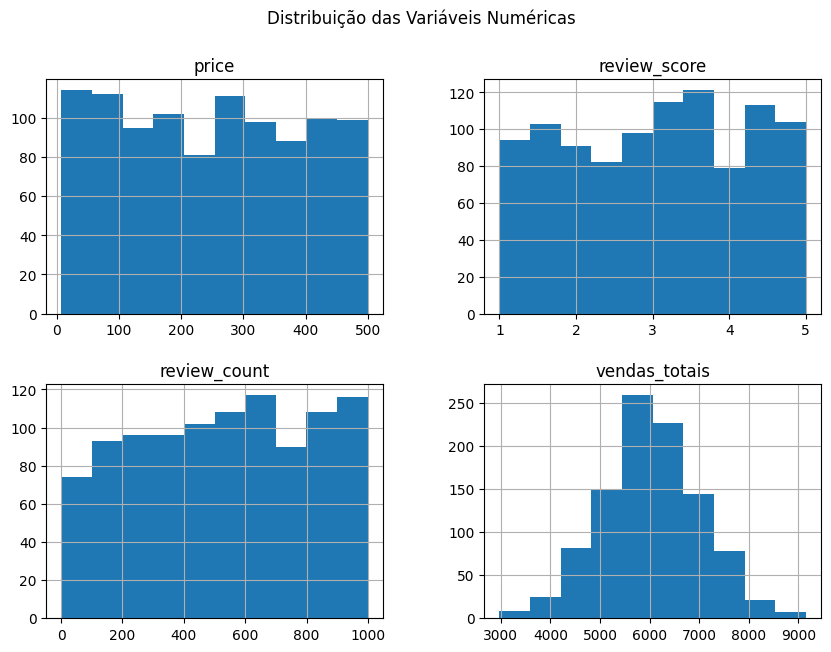

In [142]:
df[colunas_numericas].hist(figsize=(10, 7))
plt.suptitle('Distribuição das Variáveis Numéricas')
plt.show()

*  Análise de outliers

<Axes: >

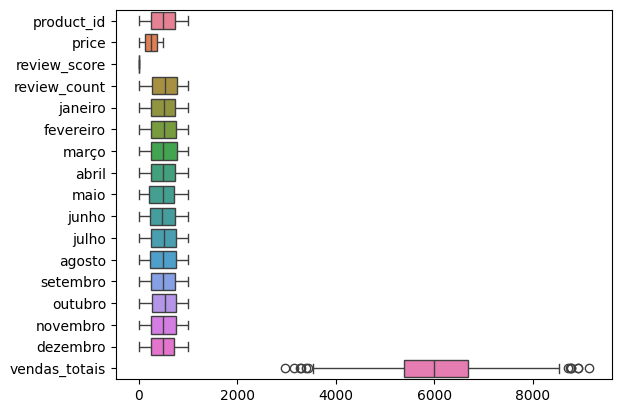

In [139]:
sns.boxplot(data = df, orient='h')

*  Observa-se a presença de outliers em 'vendas_totais', mas observando os dados estatísticos e levando em consideração que existem produtos de diferentes valores, e diferentes quantidades de vendas, não se considera um outlier verdadeiro.

# AVALIANDO VENDAS DE ACORDO COM A CATEGORIA

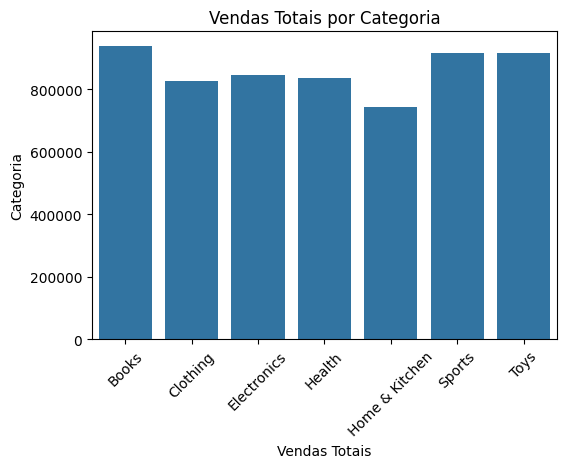

In [143]:
category_sales_total = df.groupby('category')['vendas_totais'].sum()
plt.figure(figsize=(6, 4))
sns.barplot(category_sales_total)
plt.title('Vendas Totais por Categoria')
plt.xlabel('Vendas Totais')
plt.ylabel('Categoria')
plt.xticks(rotation=45)
plt.show()

*  Valor das vendas em cada categoria

In [144]:
category_sales_total

category
Books             938229
Clothing          826536
Electronics       845120
Health            834414
Home & Kitchen    742141
Sports            916371
Toys              917101
Name: vendas_totais, dtype: int64

# Valor das vendas mensais por categoria

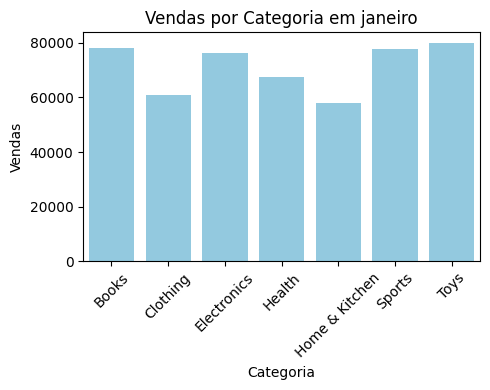

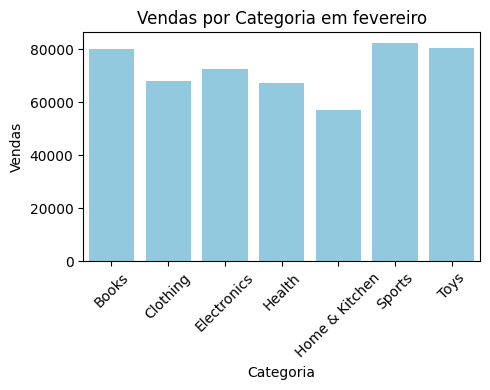

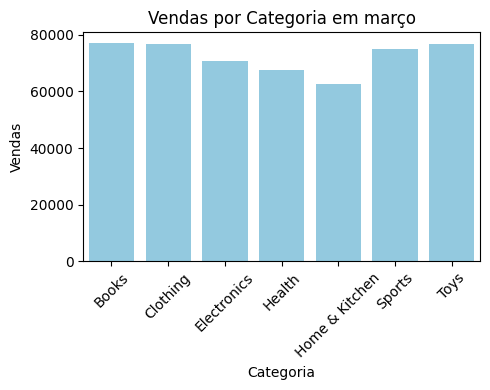

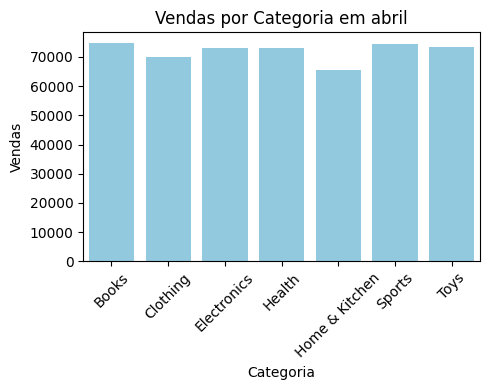

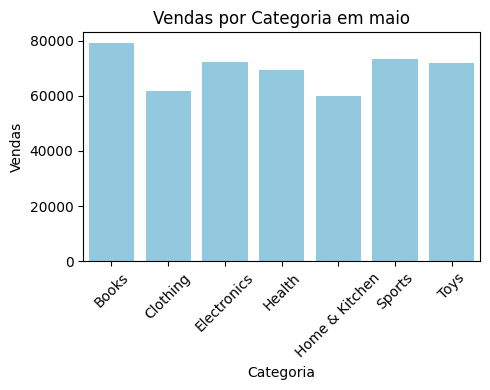

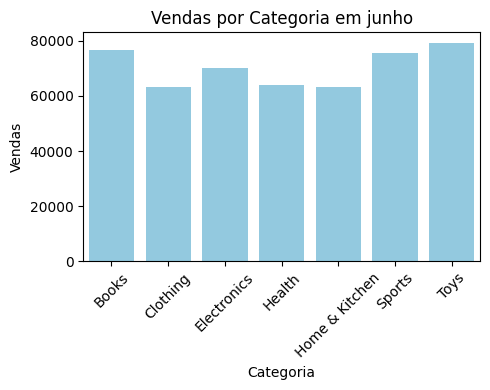

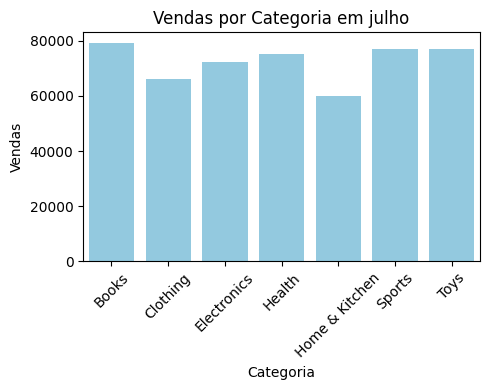

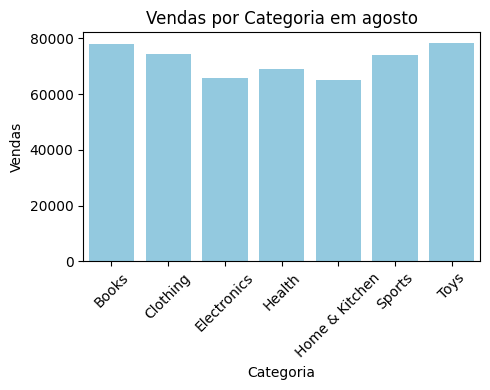

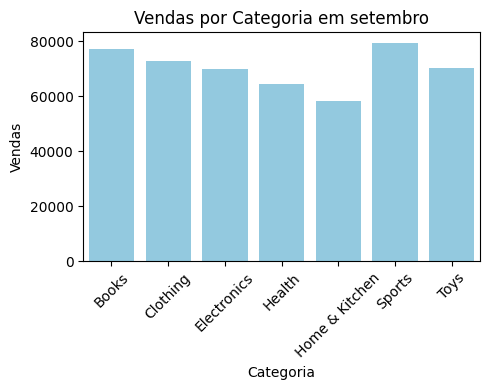

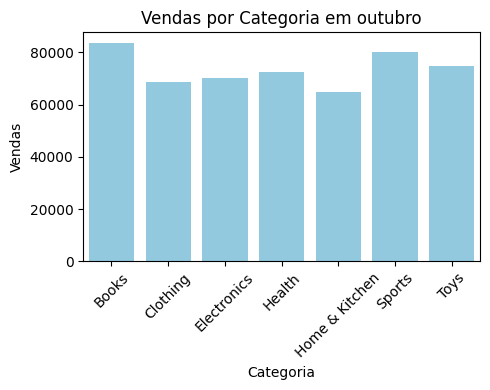

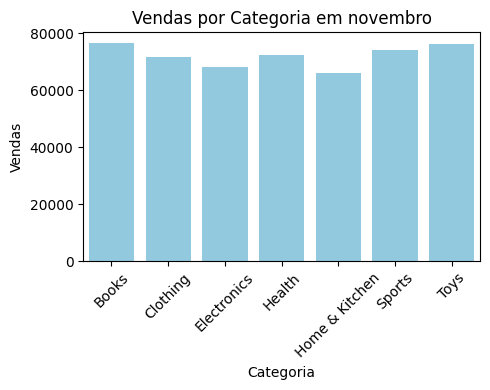

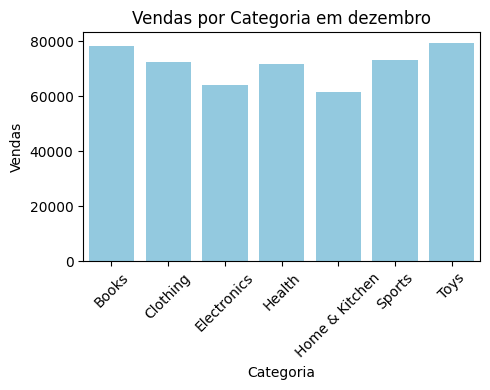

In [29]:
meses = df[['janeiro', 'fevereiro', 'março','abril', 'maio', 'junho', 'julho', 'agosto', 'setembro', 'outubro', 'novembro', 'dezembro']]

for mes in meses:
  category_sales = df.groupby('category')[mes].sum()
  titulo = f'Vendas por Categoria em {mes}'

  plt.figure(figsize=(5, 4))
  sns.barplot(category_sales, color='skyblue')
  plt.xlabel('Categoria')
  plt.ylabel('Vendas')
  plt.title(titulo)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()




# Avaliando as vendas por período

*  Total de venda em cada mês

In [31]:
somas_mensais = meses.sum(axis=0)
somas_mensais

janeiro      498306
fevereiro    507661
março        506739
abril        503823
maio         487194
junho        491653
julho        507011
agosto       504569
setembro     491934
outubro      514798
novembro     505838
dezembro     500386
dtype: int64

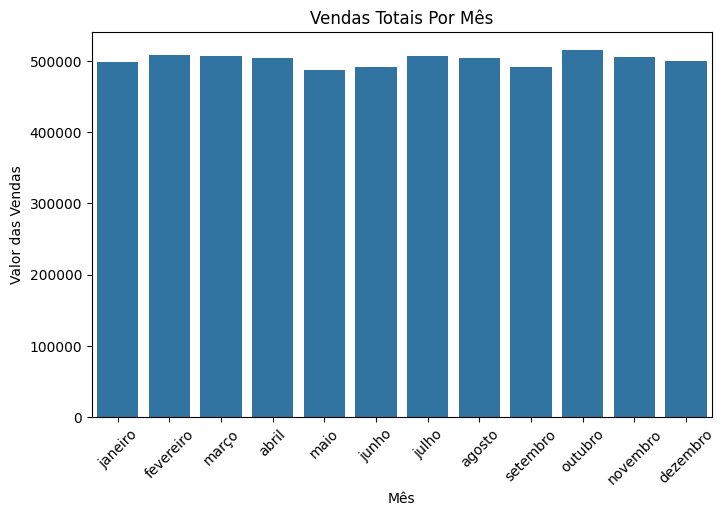

In [34]:
plt.figure(figsize=(8, 5))
sns.barplot(somas_mensais)
plt.xlabel('Mês')
plt.ylabel('Valor das Vendas')
plt.title('Vendas Totais Por Mês')
plt.xticks(rotation=45)
plt.show()


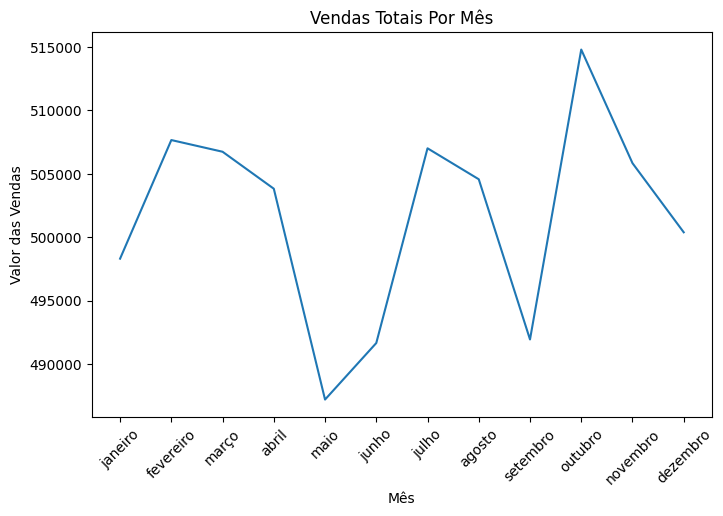

In [35]:
plt.figure(figsize=(8, 5))
plt.plot(somas_mensais.index, somas_mensais.values)
plt.xlabel('Mês')
plt.ylabel('Valor das Vendas')
plt.title('Vendas Totais Por Mês')
plt.xticks(rotation=45)
plt.show()

*  Calculando os 10 produtos mais vendidos

In [151]:
top_10_products = df.nlargest(10, 'review_count')
top_10_products

,product_id,product_name,category,price,review_score,review_count,janeiro,fevereiro,março,abril,maio,junho,julho,agosto,setembro,outubro,novembro,dezembro,vendas_totais
902,903,Product_903,Sports,94.81,4.0,999,913,537,227,74,386,132,329,480,697,481,41,258,4555
569,570,Product_570,Electronics,177.39,2.8,998,847,560,656,258,703,762,800,889,674,848,302,207,7506
731,732,Product_732,Health,408.21,3.5,998,896,263,5,813,246,417,214,393,63,620,469,949,5348
359,360,Product_360,Toys,289.86,3.4,996,783,894,749,665,160,696,758,712,899,792,424,665,8197
888,889,Product_889,Books,54.22,3.9,996,174,642,612,400,646,851,470,603,616,582,928,611,7135
11,12,Product_12,Health,485.11,5.0,991,276,214,991,906,495,374,962,100,201,819,491,132,5961
225,226,Product_226,Toys,125.77,3.6,990,728,690,285,510,23,520,949,673,166,859,335,565,6303
649,650,Product_650,Sports,251.73,3.8,990,857,513,140,903,12,765,600,517,767,240,769,7,6090
448,449,Product_449,Electronics,191.25,4.8,988,361,294,883,305,610,29,642,112,911,472,657,552,5828
631,632,Product_632,Electronics,448.13,2.4,988,545,519,611,924,719,102,185,926,939,185,239,134,6028


*  Análisando o que os 10 produtos mais vendidos tem em comum

*  Análise das categorias dos top 10 produtos

In [152]:
features_comum = top_10_products[['category', 'price', 'review_score', 'review_count']]
category_counts = features_comum['category'].value_counts()
category_counts

category
Electronics    3
Sports         2
Health         2
Toys           2
Books          1
Name: count, dtype: int64

*  Análise da distribuição do preço e avaliação dos top 10 produtos

Text(0.5, 1.0, 'Distribuição da Qtde. de Avaliações')

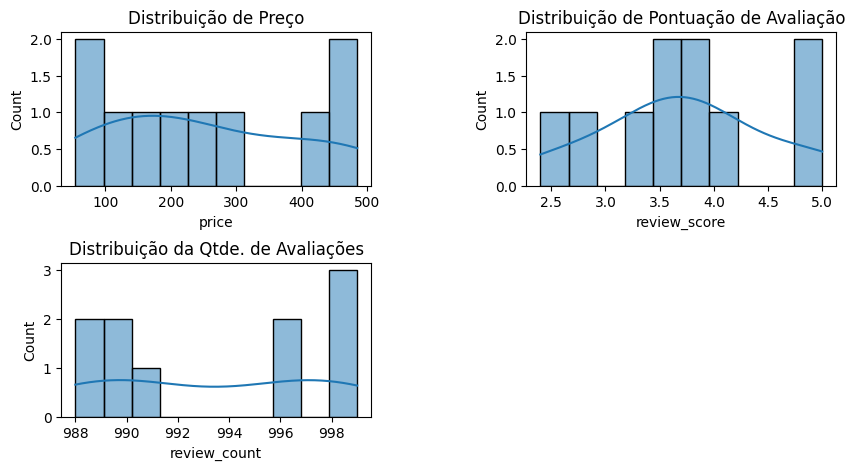

In [149]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.5)
# Preço
plt.subplot(2, 2, 1)
sns.histplot(features_comum['price'], bins=10, kde=True)
plt.title('Distribuição de Preço')
plt.subplot(2, 2, 2)
sns.histplot(features_comum['review_score'], bins=10, kde=True)
plt.title('Distribuição de Pontuação de Avaliação')
plt.subplot(2, 2, 3)
sns.histplot(features_comum['review_count'], bins=10, kde=True)
plt.title('Distribuição da Qtde. de Avaliações')

# ENTENDENDO AS CORRELAÇÕES

*  Avaliando se existe uma relação linear entre as avaliações e os preços

In [153]:
correlacao = df['price'].corr(df['review_score'])
correlacao

0.02895978542431915

In [ ]:
r, p_value = pearsonr(df['price'], df['review_score'])
r

0.028959785424319148

In [ ]:
X = df[['review_score']].values
y = df[['price']].values
x = X.reshape(-1,1)
modelo = LinearRegression()
modelo.fit(x,y)

LinearRegression()

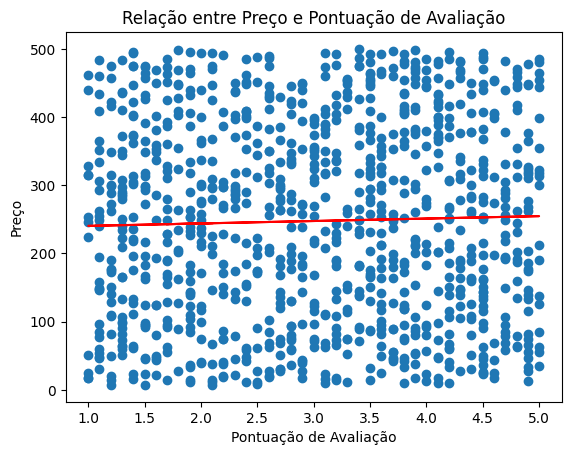

In [ ]:
plt.scatter(x,y)
plt.plot(x, modelo.predict(x), color = 'red')
plt.title('Relação entre Preço e Pontuação de Avaliação')
plt.xlabel('Pontuação de Avaliação')
plt.ylabel('Preço')
plt.show()

*  Avaliando se existe uma relação ente a categoria e a avaliaçao, através da média.

In [154]:
avaliacao_categoria = df.groupby('category')[['review_score']].mean()
avaliacao_categoria

,review_score
category,
Books,3.096753
Clothing,2.952143
Electronics,3.143478
Health,3.005036
Home & Kitchen,3.035200
Sports,3.091503
Toys,2.870861


*  Avaliando se existe uma relação linear entre as avaliações e as vendas


In [39]:
correlacao_sales = df['total_sales'].corr(df['review_score'])
correlacao_sales

-0.01818621758928649

In [41]:
r_sales, p_value = pearsonr(df['total_sales'], df['review_score'])
r_sales

-0.01818621758928649

In [48]:
X_sales = df[['review_score']].values
y_sales = df[['total_sales']].values
X_sales = X_sales.reshape(-1,1)
modelo = LinearRegression()
modelo.fit(X_sales,y_sales)

LinearRegression()

Text(0, 0.5, 'Vendas')

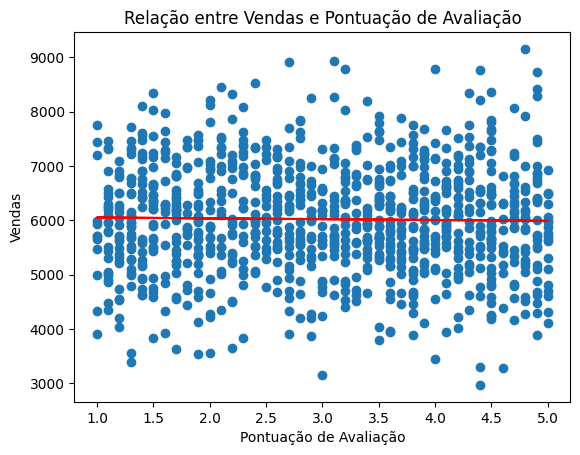

In [51]:
plt.scatter(X_sales,y_sales)
plt.plot(X_sales, modelo.predict(X_sales), color = 'red')
plt.title('Relação entre Vendas e Pontuação de Avaliação')
plt.xlabel('Pontuação de Avaliação')
plt.ylabel('Vendas')

*  Avaliando se existe uma relação linear entre o preço e as vendas

In [52]:
correlation_price_sales = df['price'].corr(df['total_sales'])
correlation_price_sales

-0.015977596125608933

In [60]:
X_price = df[['price']].values
y_price = df[['total_sales']].values
X_price = X_price.reshape(-1,1)
modelo = LinearRegression()
modelo.fit(X_price,y_price)

LinearRegression()

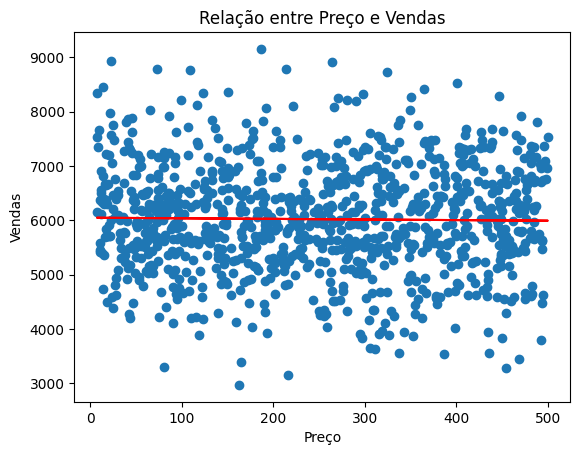

In [61]:
plt.scatter(df['price'],df['total_sales'])
plt.plot(X_price, modelo.predict(X_price), color = 'red')
plt.title('Relação entre Preço e Vendas')
plt.xlabel('Preço')
plt.ylabel('Vendas')
plt.show()